In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/d01_raw/movies_complete.csv", parse_dates=["release_date"]) 

In [3]:
df_best = df[['poster_path', 'title', 'budget_musd', 'revenue_musd', 'vote_count', 'vote_average', 'popularity']].copy()
df_best.head()

poster_path  \
0  <img src='http://image.tmdb.org/t/p/w185//uXDf...   
1  <img src='http://image.tmdb.org/t/p/w185//vgpX...   
2  <img src='http://image.tmdb.org/t/p/w185//1FSX...   
3  <img src='http://image.tmdb.org/t/p/w185//4wjG...   
4  <img src='http://image.tmdb.org/t/p/w185//lf9R...   

                         title  budget_musd  revenue_musd  vote_count  \
0                    Toy Story         30.0    373.554033      5415.0   
1                      Jumanji         65.0    262.797249      2413.0   
2             Grumpier Old Men          NaN           NaN        92.0   
3            Waiting to Exhale         16.0     81.452156        34.0   
4  Father of the Bride Part II          NaN     76.578911       173.0   

   vote_average  popularity  
0           7.7   21.946943  
1           6.9   17.015539  
2           6.5   11.712900  
3           6.1    3.859495  
4           5.7    8.387519

In [4]:
df_best['profit_musd'] = df.revenue_musd.sub(df.budget_musd)
df_best['return'] = df.revenue_musd.div(df.budget_musd)

In [5]:
df_best.columns = ["", "Title", "Budget", "Revenue", "Votes", "Average Rating", "Popularity", "Profit", "ROI"]

In [6]:
df_best.set_index("Title", inplace=True)

In [7]:
subset = df_best.iloc[:5, :2]
subset

\
Title                                                                            
Toy Story                    <img src='http://image.tmdb.org/t/p/w185//uXDf...   
Jumanji                      <img src='http://image.tmdb.org/t/p/w185//vgpX...   
Grumpier Old Men             <img src='http://image.tmdb.org/t/p/w185//1FSX...   
Waiting to Exhale            <img src='http://image.tmdb.org/t/p/w185//4wjG...   
Father of the Bride Part II  <img src='http://image.tmdb.org/t/p/w185//lf9R...   

                             Budget  
Title                                
Toy Story                      30.0  
Jumanji                        65.0  
Grumpier Old Men                NaN  
Waiting to Exhale              16.0  
Father of the Bride Part II     NaN

In [8]:
df_best.sort_values(by="Average Rating", ascending=False)

\
Title                                                                                           
Portrait of a Young Man in Three Movements                                                NaN   
Brave Revolutionary                         <img src='http://image.tmdb.org/t/p/w185//zAb2...   
Other Voices Other Rooms                    <img src='http://image.tmdb.org/t/p/w185//4ifP...   
The Lion of Thebes                          <img src='http://image.tmdb.org/t/p/w185//tdOc...   
Katt Williams: Priceless: Afterlife         <img src='http://image.tmdb.org/t/p/w185//wKrH...   
...                                                                                       ...   
Altar of Fire                               <img src='http://image.tmdb.org/t/p/w185//iJ78...   
The Wonders of Aladdin                      <img src='http://image.tmdb.org/t/p/w185//AvfX...   
Deep Hearts                                 <img src='http://image.tmdb.org/t/p/w185//8jI4...   
Satan Triumphant                            <img src='http://image.tmdb.org/t/p/w185//aorB...   
Queerama                                    <img src='http://image.tmdb.org/t/p/w185//oxFE...   

                                            Budget  Revenue  Votes  \
Title                                                                
Portrait of a Young Man in Three Movements     NaN      NaN    1.0   
Brave Revolutionary                            NaN      NaN    1.0   
Other Voices Other Rooms                       NaN      NaN    1.0   
The Lion of Thebes                             NaN      NaN    1.0   
Katt Williams: Priceless: Afterlife            NaN      NaN    2.0   
...                                            ...      ...    ...   
Altar of Fire                                  NaN      NaN    0.0   
The Wonders of Aladdin                         NaN      NaN    0.0   
Deep Hearts                                    NaN      NaN    0.0   
Satan Triumphant                               NaN      NaN    0.0   
Queerama                                       NaN      NaN    0.0   

                                            Average Rating  Popularity  \
Title                                                                    
Portrait of a Young Man in Three Movements            10.0    0.036471   
Brave Revolutionary                                   10.0    0.318826   
Other Voices Other Rooms                              10.0    0.036680   
The Lion of Thebes                                    10.0    1.783625   
Katt Williams: Priceless: Afterlife                   10.0    0.476007   
...                                                    ...         ...   
Altar of Fire                                          NaN    0.000000   
The Wonders of Aladdin                                 NaN    0.093498   
Deep Hearts                                            NaN    0.011025   
Satan Triumphant                                       NaN    0.003503   
Queerama                                               NaN    0.163015   

                                            Profit  ROI  
Title                                                    
Portrait of a Young Man in Three Movements     NaN  NaN  
Brave Revolutionary                            NaN  NaN  
Other Voices Other Rooms                       NaN  NaN  
The Lion of Thebes                             NaN  NaN  
Katt Williams: Priceless: Afterlife            NaN  NaN  
...                                            ...  ...  
Altar of Fire                                  NaN  NaN  
The Wonders of Aladdin                         NaN  NaN  
Deep Hearts                                    NaN  NaN  
Satan Triumphant                               NaN  NaN  
Queerama                                       NaN  NaN  

[44691 rows x 8 columns]

In [9]:
df_best.sort_values(by='ROI', ascending=False)

\
Title                                                                        
Less Than Zero           <img src='http://image.tmdb.org/t/p/w185//1GY0...   
Modern Times             <img src='http://image.tmdb.org/t/p/w185//7uoi...   
Welcome to Dongmakgol    <img src='http://image.tmdb.org/t/p/w185//5iGV...   
Aquí Entre Nos           <img src='http://image.tmdb.org/t/p/w185//oflx...   
The Karate Kid, Part II  <img src='http://image.tmdb.org/t/p/w185//mSne...   
...                                                                    ...   
Subdue                   <img src='http://image.tmdb.org/t/p/w185//pfC8...   
Century of Birthing      <img src='http://image.tmdb.org/t/p/w185//xZkm...   
Betrayal                 <img src='http://image.tmdb.org/t/p/w185//eGga...   
Satan Triumphant         <img src='http://image.tmdb.org/t/p/w185//aorB...   
Queerama                 <img src='http://image.tmdb.org/t/p/w185//oxFE...   

                           Budget     Revenue  Votes  Average Rating  \
Title                                                                  
Less Than Zero           0.000001   12.396383   77.0             6.1   
Modern Times             0.000001    8.500000  881.0             8.1   
Welcome to Dongmakgol    0.000008   33.579813   49.0             7.7   
Aquí Entre Nos           0.000001    2.755584    3.0             6.0   
The Karate Kid, Part II  0.000113  115.103979  457.0             5.9   
...                           ...         ...    ...             ...   
Subdue                        NaN         NaN    1.0             4.0   
Century of Birthing           NaN         NaN    3.0             9.0   
Betrayal                      NaN         NaN    6.0             3.8   
Satan Triumphant              NaN         NaN    0.0             NaN   
Queerama                      NaN         NaN    0.0             NaN   

                         Popularity      Profit           ROI  
Title                                                          
Less Than Zero             4.028679   12.396382  1.239638e+07  
Modern Times               8.159556    8.499999  8.500000e+06  
Welcome to Dongmakgol      4.222195   33.579805  4.197477e+06  
Aquí Entre Nos             0.230075    2.755583  2.755584e+06  
The Karate Kid, Part II    9.231318  115.103866  1.018619e+06  
...                             ...         ...           ...  
Subdue                     0.072051         NaN           NaN  
Century of Birthing        0.178241         NaN           NaN  
Betrayal                   0.903007         NaN           NaN  
Satan Triumphant           0.003503         NaN           NaN  
Queerama                   0.163015         NaN           NaN  

[44691 rows x 8 columns]

In [10]:
df_best.Budget.fillna(0, inplace=True)
df_best.Votes.fillna(0, inplace=True)

C:\Users\vinic\AppData\Local\Temp\ipykernel_19448\1703967914.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_best.Budget.fillna(0, inplace=True)
C:\Users\vinic\AppData\Local\Temp\ipykernel_19448\1703967914.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [11]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   44467 non-null  object 
 1   Budget          44691 non-null  float64
 2   Revenue         7385 non-null   float64
 3   Votes           44691 non-null  float64
 4   Average Rating  42077 non-null  float64
 5   Popularity      44691 non-null  float64
 6   Profit          5371 non-null   float64
 7   ROI             5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [12]:
def best_worst(n, by, ascending = False, min_bud = 0, min_votes = 0):
    df2 = df_best.loc[(df_best.Budget >= min_bud) & (df_best.Votes >= min_votes),
                      ["", by]].sort_values(by=by, ascending= ascending).head(n).copy()
    return df2

In [13]:
best_worst(5, by='Revenue')

\
Title                                                                             
Avatar                        <img src='http://image.tmdb.org/t/p/w185//btnl...   
Star Wars: The Force Awakens  <img src='http://image.tmdb.org/t/p/w185//9rd0...   
Titanic                       <img src='http://image.tmdb.org/t/p/w185//9xjZ...   
The Avengers                  <img src='http://image.tmdb.org/t/p/w185//RYMX...   
Jurassic World                <img src='http://image.tmdb.org/t/p/w185//rhr4...   

                                  Revenue  
Title                                      
Avatar                        2787.965087  
Star Wars: The Force Awakens  2068.223624  
Titanic                       1845.034188  
The Avengers                  1519.557910  
Jurassic World                1513.528810

In [14]:
best_worst(5, by="Budget")

\
Title                                                                                            
Pirates of the Caribbean: On Stranger Tides  <img src='http://image.tmdb.org/t/p/w185//keGf...   
Pirates of the Caribbean: At World's End     <img src='http://image.tmdb.org/t/p/w185//oVh3...   
Avengers: Age of Ultron                      <img src='http://image.tmdb.org/t/p/w185//4ssD...   
Superman Returns                             <img src='http://image.tmdb.org/t/p/w185//6ZYO...   
Transformers: The Last Knight                <img src='http://image.tmdb.org/t/p/w185//s5HQ...   

                                             Budget  
Title                                                
Pirates of the Caribbean: On Stranger Tides   380.0  
Pirates of the Caribbean: At World's End      300.0  
Avengers: Age of Ultron                       280.0  
Superman Returns                              270.0  
Transformers: The Last Knight                 260.0

In [15]:
best_worst(5, by="Profit", ascending=True)

\
Title                                                                                            
The Lone Ranger                              <img src='http://image.tmdb.org/t/p/w185//b2je...   
The Alamo                                    <img src='http://image.tmdb.org/t/p/w185//aZrW...   
Mars Needs Moms                              <img src='http://image.tmdb.org/t/p/w185//lOKq...   
Valerian and the City of a Thousand Planets  <img src='http://image.tmdb.org/t/p/w185//jfIp...   
The 13th Warrior                             <img src='http://image.tmdb.org/t/p/w185//7pyh...   

                                                 Profit  
Title                                                    
The Lone Ranger                             -165.710090  
The Alamo                                   -119.180039  
Mars Needs Moms                             -111.007242  
Valerian and the City of a Thousand Planets -107.447384  
The 13th Warrior                             -98.301101

In [16]:
best_worst(5, "ROI", min_bud=50)

\
Title                                                                            
Minions                      <img src='http://image.tmdb.org/t/p/w185//tMaG...   
Jurassic Park                <img src='http://image.tmdb.org/t/p/w185//oU7O...   
The Twilight Saga: New Moon  <img src='http://image.tmdb.org/t/p/w185//j5jM...   
Deadpool                     <img src='http://image.tmdb.org/t/p/w185//fSRb...   
Despicable Me 2              <img src='http://image.tmdb.org/t/p/w185//xL6t...   

                                   ROI  
Title                                   
Minions                      15.631499  
Jurassic Park                14.604762  
The Twilight Saga: New Moon  14.196549  
Deadpool                     13.501948  
Despicable Me 2              12.773183

In [17]:
best_worst(5, "ROI", ascending=True, min_bud=100)

\
Title                                                                             
The Adventures of Pluto Nash  <img src='http://image.tmdb.org/t/p/w185//96vv...   
The Alamo                     <img src='http://image.tmdb.org/t/p/w185//aZrW...   
Live by Night                 <img src='http://image.tmdb.org/t/p/w185//bkd4...   
Mars Needs Moms               <img src='http://image.tmdb.org/t/p/w185//lOKq...   
The Lone Ranger               <img src='http://image.tmdb.org/t/p/w185//b2je...   

                                   ROI  
Title                                   
The Adventures of Pluto Nash  0.071040  
The Alamo                     0.178069  
Live by Night                 0.209987  
Mars Needs Moms               0.259952  
The Lone Ranger               0.350157

In [18]:
best_worst(5, "Votes")

Votes
Title                                                                      
Inception        <img src='http://image.tmdb.org/t/p/w185//9gk7...  14075.0
The Dark Knight  <img src='http://image.tmdb.org/t/p/w185//qJ2t...  12269.0
Avatar           <img src='http://image.tmdb.org/t/p/w185//btnl...  12114.0
The Avengers     <img src='http://image.tmdb.org/t/p/w185//RYMX...  12000.0
Deadpool         <img src='http://image.tmdb.org/t/p/w185//fSRb...  11444.0

In [19]:
best_worst(5, "Average Rating", min_votes=0)

\
Title                                                                                           
Portrait of a Young Man in Three Movements                                                NaN   
Brave Revolutionary                         <img src='http://image.tmdb.org/t/p/w185//zAb2...   
Other Voices Other Rooms                    <img src='http://image.tmdb.org/t/p/w185//4ifP...   
The Lion of Thebes                          <img src='http://image.tmdb.org/t/p/w185//tdOc...   
Katt Williams: Priceless: Afterlife         <img src='http://image.tmdb.org/t/p/w185//wKrH...   

                                            Average Rating  
Title                                                       
Portrait of a Young Man in Three Movements            10.0  
Brave Revolutionary                                   10.0  
Other Voices Other Rooms                              10.0  
The Lion of Thebes                                    10.0  
Katt Williams: Priceless: Afterlife                   10.0

In [20]:
best_worst(5, "Average Rating",ascending=True ,min_votes=20, min_bud=0)

\
Title                                                                             
Saving Christmas              <img src='http://image.tmdb.org/t/p/w185//6MLS...   
Superbabies: Baby Geniuses 2  <img src='http://image.tmdb.org/t/p/w185//7viU...   
Manos: The Hands of Fate      <img src='http://image.tmdb.org/t/p/w185//dcDR...   
Birdemic: Shock and Terror    <img src='http://image.tmdb.org/t/p/w185//lNC2...   
Transmorphers                 <img src='http://image.tmdb.org/t/p/w185//lgVw...   

                              Average Rating  
Title                                         
Saving Christmas                         1.7  
Superbabies: Baby Geniuses 2             1.9  
Manos: The Hands of Fate                 2.0  
Birdemic: Shock and Terror               2.1  
Transmorphers                            2.2

# GENDER:


In [21]:
df.genres[0]

'Animation|Comedy|Family'

In [22]:
mask_genres = df.genres.str.contains("Action") &  df.genres.str.contains("Science Fiction")
mask_genres

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: genres, Length: 44691, dtype: bool

In [23]:
df.cast[0]

'Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette'

In [24]:
mask_actor = df.cast.str.contains("Bruce Willis")
mask_actor

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690      NaN
Name: cast, Length: 44691, dtype: object

In [25]:
df.loc[mask_genres & mask_actor, ["title", "vote_average"]].sort_values(by="vote_average", ascending=False)

title  vote_average
1448       The Fifth Element           7.3
19218                 Looper           6.6
1786              Armageddon           6.5
14135             Surrogates           5.9
20333  G.I. Joe: Retaliation           5.4
27619                   Vice           4.1

In [26]:
df.director

0           John Lasseter
1            Joe Johnston
2           Howard Deutch
3         Forest Whitaker
4           Charles Shyer
               ...       
44686    Hamid Nematollah
44687            Lav Diaz
44688      Mark L. Lester
44689    Yakov Protazanov
44690       Daisy Asquith
Name: director, Length: 44691, dtype: object

In [27]:
mask_director = df.director == "Quentin Tarantino"

In [28]:
mask_actor = df.cast.str.contains("Uma Thurman")

In [29]:
quentin = df.loc[mask_director & mask_actor, ["title", "poster_path", "runtime"]].sort_values(by="runtime", ascending=False).set_index("title")
quentin

poster_path  runtime
title                                                                        
Pulp Fiction       <img src='http://image.tmdb.org/t/p/w185//d5iI...    154.0
Kill Bill: Vol. 2  <img src='http://image.tmdb.org/t/p/w185//2yhg...    136.0
Kill Bill: Vol. 1  <img src='http://image.tmdb.org/t/p/w185//v7Ta...    111.0

In [30]:
df.production_companies[1]

'TriStar Pictures|Teitler Film|Interscope Communications'

In [31]:
mask_studio = df.production_companies.str.contains("Pixar").fillna(False)

C:\Users\vinic\AppData\Local\Temp\ipykernel_19448\1774404027.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask_studio = df.production_companies.str.contains("Pixar").fillna(False)


In [32]:
df.release_date

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
44686          NaT
44687   2011-11-17
44688   2003-08-01
44689   1917-10-21
44690   2017-06-09
Name: release_date, Length: 44691, dtype: datetime64[ns]

In [33]:
mask_time = df.release_date.between("2010-01-01", "2015-12-31")

In [34]:
pixar = df.loc[mask_studio & mask_time, ["title", "poster_path", "revenue_musd", "release_date"]].sort_values(by="revenue_musd", ascending=True).set_index("title")
pixar

poster_path  \
title                                                                           
The Good Dinosaur           <img src='http://image.tmdb.org/t/p/w185//8RSk...   
Brave                       <img src='http://image.tmdb.org/t/p/w185//8l0p...   
Cars 2                      <img src='http://image.tmdb.org/t/p/w185//okIz...   
Monsters University         <img src='http://image.tmdb.org/t/p/w185//tyHH...   
Inside Out                  <img src='http://image.tmdb.org/t/p/w185//lRHE...   
Toy Story 3                 <img src='http://image.tmdb.org/t/p/w185//amY0...   
Day & Night                 <img src='http://image.tmdb.org/t/p/w185//eQ1Q...   
The Blue Umbrella           <img src='http://image.tmdb.org/t/p/w185//iSWV...   
Toy Story of Terror!        <img src='http://image.tmdb.org/t/p/w185//aNDr...   
La luna                     <img src='http://image.tmdb.org/t/p/w185//iS6D...   
Hawaiian Vacation           <img src='http://image.tmdb.org/t/p/w185//tByW...   
Small Fry                   <img src='http://image.tmdb.org/t/p/w185//z096...   
Partysaurus Rex             <img src='http://image.tmdb.org/t/p/w185//ylj9...   
The Legend of Mor'du        <img src='http://image.tmdb.org/t/p/w185//8FKR...   
Toy Story That Time Forgot  <img src='http://image.tmdb.org/t/p/w185//jqQP...   
Lava                        <img src='http://image.tmdb.org/t/p/w185//blZS...   
Sanjay's Super Team         <img src='http://image.tmdb.org/t/p/w185//mShc...   
Air Mater                   <img src='http://image.tmdb.org/t/p/w185//jDwg...   
Riley's First Date?         <img src='http://image.tmdb.org/t/p/w185//pyry...   

                            revenue_musd release_date  
title                                                  
The Good Dinosaur             331.926147   2015-11-14  
Brave                         538.983207   2012-06-21  
Cars 2                        559.852396   2011-06-11  
Monsters University           743.559607   2013-06-20  
Inside Out                    857.611174   2015-06-09  
Toy Story 3                  1066.969703   2010-06-16  
Day & Night                          NaN   2010-06-17  
The Blue Umbrella                    NaN   2013-02-12  
Toy Story of Terror!                 NaN   2013-10-15  
La luna                              NaN   2011-01-01  
Hawaiian Vacation                    NaN   2011-06-16  
Small Fry                            NaN   2011-11-23  
Partysaurus Rex                      NaN   2012-09-14  
The Legend of Mor'du                 NaN   2012-01-01  
Toy Story That Time Forgot           NaN   2014-12-02  
Lava                                 NaN   2015-06-21  
Sanjay's Super Team                  NaN   2015-11-25  
Air Mater                            NaN   2011-08-04  
Riley's First Date?                  NaN   2015-11-03

In [35]:
mask_genres = df.genres.str.contains("Action") | df.genres.str.contains("Thriller")

In [36]:
mask_lan = df.original_language == 'en'

In [37]:
mask_vote_av = df.vote_average >= 7.5

In [38]:
mask_vote_co = df.vote_count >= 10

In [39]:
next_mov = df.loc[mask_genres & mask_lan & mask_vote_av & mask_vote_co, ["title", "poster_path", "genres", "vote_average", "vote_count", "release_date"]].sort_values(by="release_date", ascending=False).set_index("title").head(20)

In [40]:
next_mov

poster_path  \
title                                                                               
Descendants 2                   <img src='http://image.tmdb.org/t/p/w185//8BNy...   
Dunkirk                         <img src='http://image.tmdb.org/t/p/w185//ebSn...   
The Book of Henry               <img src='http://image.tmdb.org/t/p/w185//suLF...   
Guardians of the Galaxy Vol. 2  <img src='http://image.tmdb.org/t/p/w185//y4MB...   
Logan                           <img src='http://image.tmdb.org/t/p/w185//fnbj...   
The Thinning                    <img src='http://image.tmdb.org/t/p/w185//55yQ...   
11.22.63                        <img src='http://image.tmdb.org/t/p/w185//5EJG...   
Star Wars: The Force Awakens    <img src='http://image.tmdb.org/t/p/w185//9rd0...   
London Spy                      <img src='http://image.tmdb.org/t/p/w185//Ef9Z...   
Spotlight                       <img src='http://image.tmdb.org/t/p/w185//28Vn...   
Room                            <img src='http://image.tmdb.org/t/p/w185//pCUR...   
The Fear of 13                  <img src='http://image.tmdb.org/t/p/w185//k5uL...   
3 ½ Minutes, 10 Bullets         <img src='http://image.tmdb.org/t/p/w185//nUQD...   
An Inspector Calls              <img src='http://image.tmdb.org/t/p/w185//2e0z...   
Kung Fury                       <img src='http://image.tmdb.org/t/p/w185//nbWY...   
Kingsman: The Secret Service    <img src='http://image.tmdb.org/t/p/w185//r6q9...   
Black Mirror: White Christmas   <img src='http://image.tmdb.org/t/p/w185//he60...   
The Imitation Game              <img src='http://image.tmdb.org/t/p/w185//ntZG...   
Big Hero 6                      <img src='http://image.tmdb.org/t/p/w185//xozr...   
Nightcrawler                    <img src='http://image.tmdb.org/t/p/w185//gYPI...   

                                                                           genres  \
title                                                                               
Descendants 2                       TV Movie|Family|Action|Comedy|Music|Adventure   
Dunkirk                                         Action|Drama|History|Thriller|War   
The Book of Henry                                            Thriller|Drama|Crime   
Guardians of the Galaxy Vol. 2            Action|Adventure|Comedy|Science Fiction   
Logan                                                Action|Drama|Science Fiction   
The Thinning                                                             Thriller   
11.22.63                                                   Drama|History|Thriller   
Star Wars: The Force Awakens             Action|Adventure|Science Fiction|Fantasy   
London Spy                                   Romance|Crime|Drama|Mystery|Thriller   
Spotlight                                                  Drama|Thriller|History   
Room                                                               Drama|Thriller   
The Fear of 13                                               Thriller|Documentary   
3 ½ Minutes, 10 Bullets                                      Thriller|Documentary   
An Inspector Calls                                           Drama|Crime|Thriller   
Kung Fury                                   Action|Comedy|Science Fiction|Fantasy   
Kingsman: The Secret Service                        Crime|Comedy|Action|Adventure   
Black Mirror: White Christmas   Drama|Horror|Mystery|Science Fiction|Thriller|...   
The Imitation Game                                     History|Drama|Thriller|War   
Big Hero 6                               Adventure|Family|Animation|Action|Comedy   
Nightcrawler                                                 Crime|Drama|Thriller   

                                vote_average  vote_count release_date  
title                                                                  
Descendants 2                            7.5       171.0   2017-07-21  
Dunkirk                                  7.5      2712.0   2017-07-19  
The Book of Henry                       

# WORDS:

In [41]:
df.tagline[1]

'Roll the dice and unleash the excitement!'

In [42]:
df.overview[1]

"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures."

In [43]:
title = df.title.dropna()
overview = df.overview.dropna()
tagline = df.tagline.dropna()

In [44]:
title

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
44686                         Subdue
44687            Century of Birthing
44688                       Betrayal
44689               Satan Triumphant
44690                       Queerama
Name: title, Length: 44691, dtype: object

In [45]:
' '.join(title)

'Toy Story Jumanji Grumpier Old Men Waiting to Exhale Father of the Bride Part II Heat Sabrina Tom and Huck Sudden Death GoldenEye The American President Dracula: Dead and Loving It Balto Nixon Cutthroat Island Casino Sense and Sensibility Four Rooms Ace Ventura: When Nature Calls Money Train Get Shorty Copycat Assassins Powder Leaving Las Vegas Othello Now and Then Persuasion The City of Lost Children Shanghai Triad Dangerous Minds Twelve Monkeys Wings of Courage Babe Carrington Dead Man Walking Across the Sea of Time It Takes Two Clueless Cry, the Beloved Country Richard III Dead Presidents Restoration Mortal Kombat To Die For How To Make An American Quilt Se7en Pocahontas When Night Is Falling The Usual Suspects Guardian Angel Mighty Aphrodite Lamerica The Big Green Georgia Kids of the Round Table Home for the Holidays The Postman The Confessional The Indian in the Cupboard Eye for an Eye Mr. Holland\'s Opus Don\'t Be a Menace to South Central While Drinking Your Juice in the Hood T

In [46]:
title_corpus = " ".join(title)
overview_corpus = " ".join(overview)
tagline_corpus = " ".join(tagline)

In [47]:
tagline_corpus

'Roll the dice and unleash the excitement! Still Yelling. Still Fighting. Still Ready for Love. Friends are the people who let you be yourself... and never let you forget it. Just When His World Is Back To Normal... He\'s In For The Surprise Of His Life! A Los Angeles Crime Saga You are cordially invited to the most surprising merger of the year. The Original Bad Boys. Terror goes into overtime. No limits. No fears. No substitutes. Why can\'t the most powerful man in the world have the one thing he wants most? Part Dog. Part Wolf. All Hero. Triumphant in Victory, Bitter in Defeat. He Changed the World, But Lost a Nation. The Course Has Been Set. There Is No Turning Back. Prepare Your Weapons. Summon Your Courage. Discover the Adventure of a Lifetime! No one stays at the top forever. Lose your heart and come to your senses. Twelve outrageous guests. Four scandalous requests. And one lone bellhop, in his first day on the job, who\'s in for the wildest New year\'s Eve of his life. New ani

In [48]:
title_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words=200).generate(title_corpus)
title_wordcloud

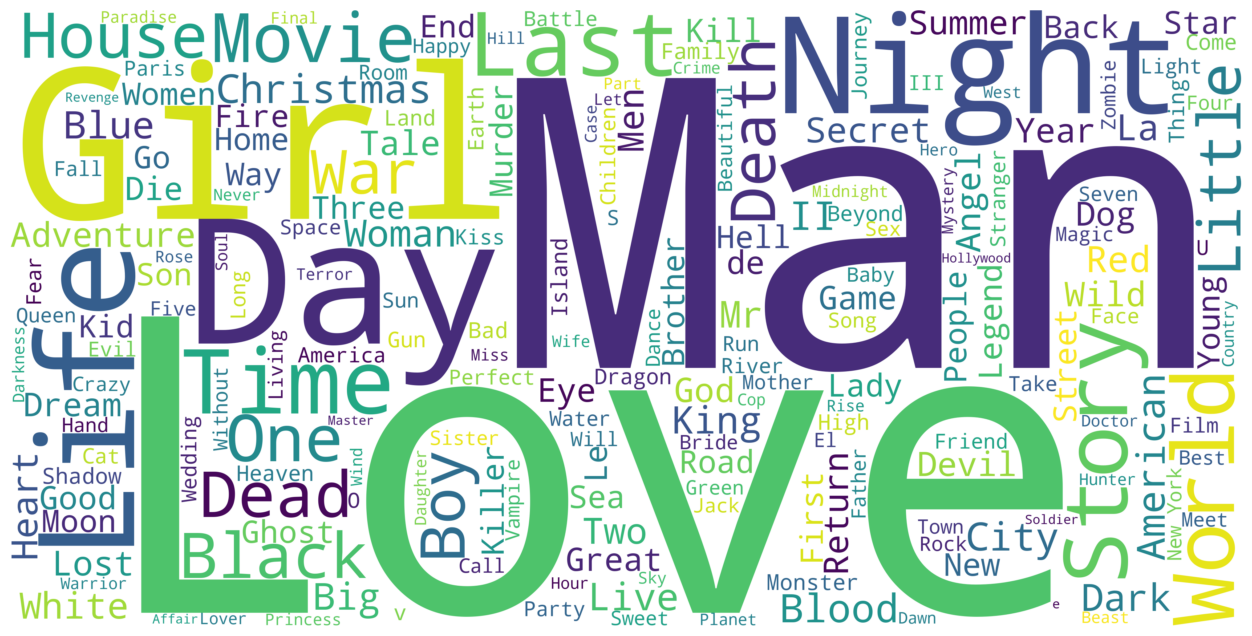

In [49]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [50]:
overview_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words=200).generate(overview_corpus)
overview_wordcloud

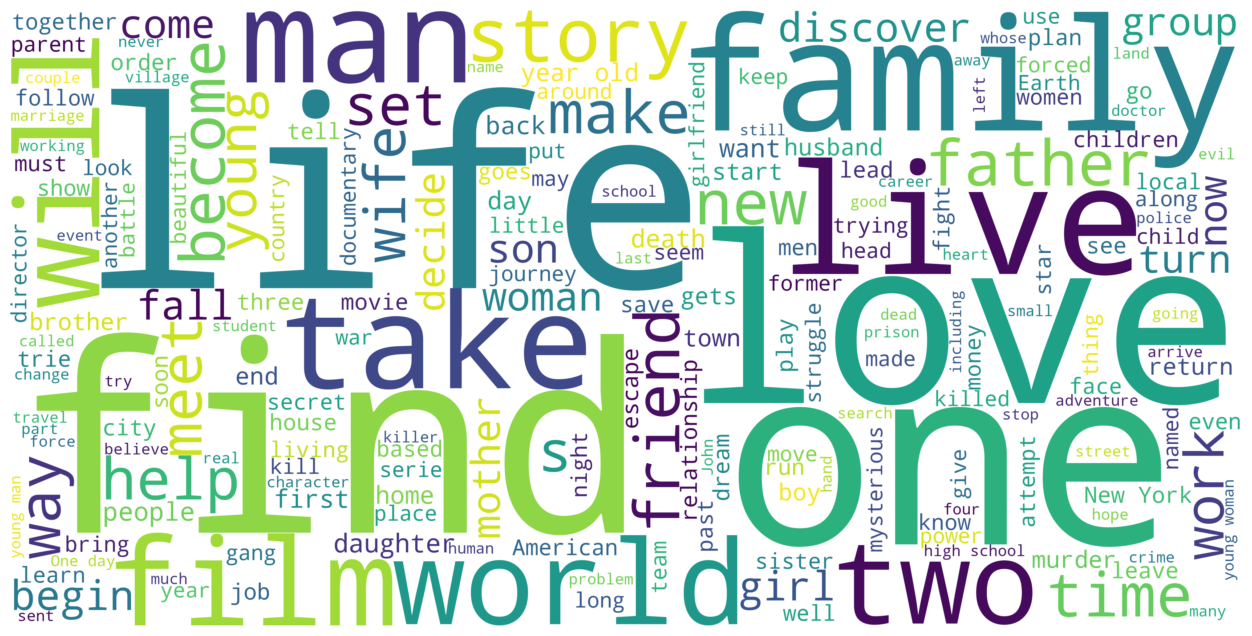

In [51]:
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [52]:
tagline_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words=200).generate(tagline_corpus)
tagline_wordcloud

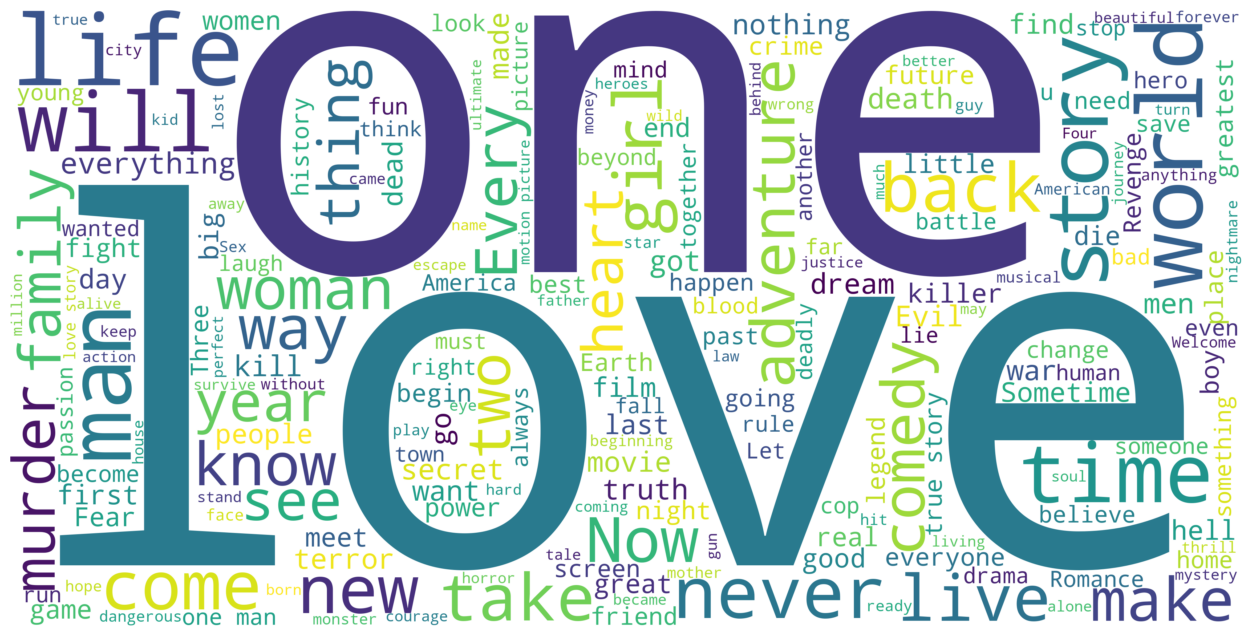

In [53]:
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Director:


In [54]:
df.director.value_counts().head(20)

director
John Ford             66
Michael Curtiz        65
Werner Herzog         54
Alfred Hitchcock      53
Georges Méliès        49
Woody Allen           49
Jean-Luc Godard       46
Sidney Lumet          46
Charlie Chaplin       44
Raoul Walsh           43
William A. Wellman    42
Henry Hathaway        41
Richard Thorpe        40
Ingmar Bergman        39
Martin Scorsese       39
Fritz Lang            38
John Huston           38
George Cukor          38
Mervyn LeRoy          37
Robert Altman         37
Name: count, dtype: int64

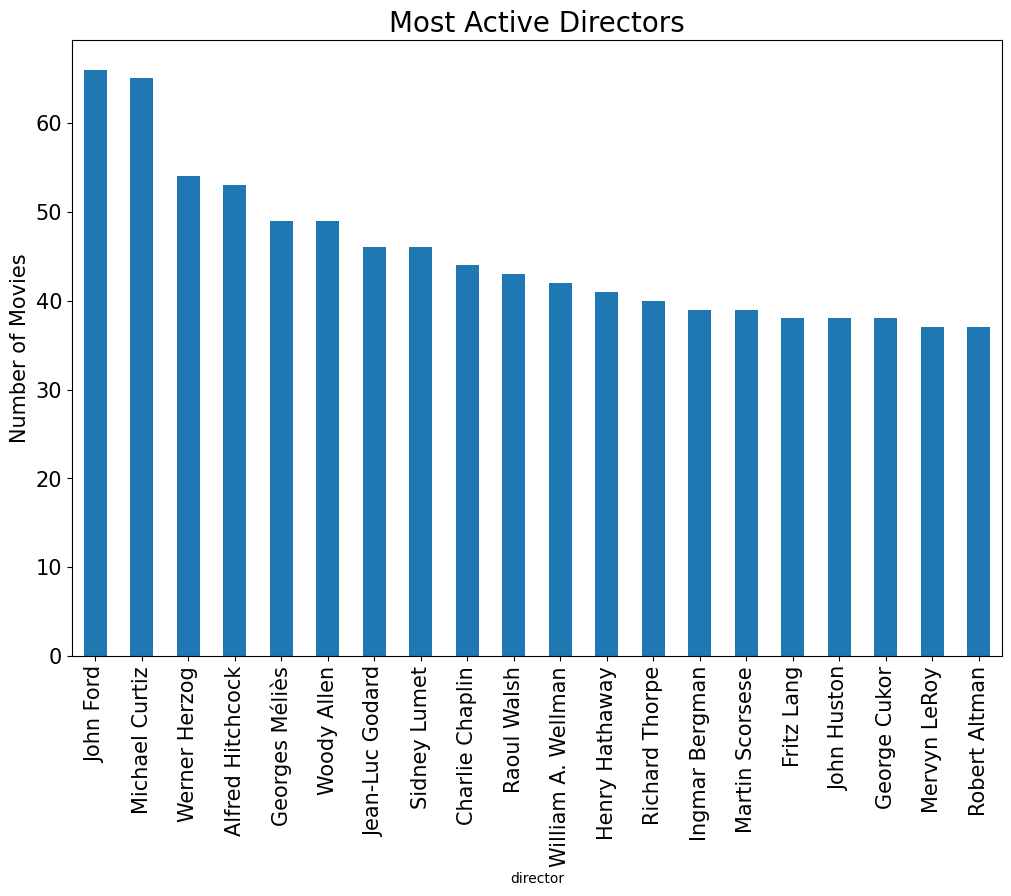

In [55]:
plt.figure(figsize=(12,8))
df.director.value_counts().head(20).plot(kind='bar', fontsize=15)
plt.title("Most Active Directors", fontsize=20)
plt.ylabel("Number of Movies", fontsize=15)
plt.show()

In [56]:
df.groupby('director').revenue_musd.sum().nlargest(20)

director
Steven Spielberg     9256.621422
Peter Jackson        6528.244659
Michael Bay          6437.466781
James Cameron        5900.610310
David Yates          5334.563196
Christopher Nolan    4747.408665
Robert Zemeckis      4138.233542
Tim Burton           4032.916124
Ridley Scott         3917.529240
Chris Columbus       3866.836869
Roland Emmerich      3798.402596
Ron Howard           3714.152341
J.J. Abrams          3579.215315
Gore Verbinski       3575.339236
George Lucas         3341.550893
Sam Raimi            3193.788606
Francis Lawrence     3183.341910
Clint Eastwood       3100.675162
Bill Condon          3017.298095
Joss Whedon          2963.831071
Name: revenue_musd, dtype: float64

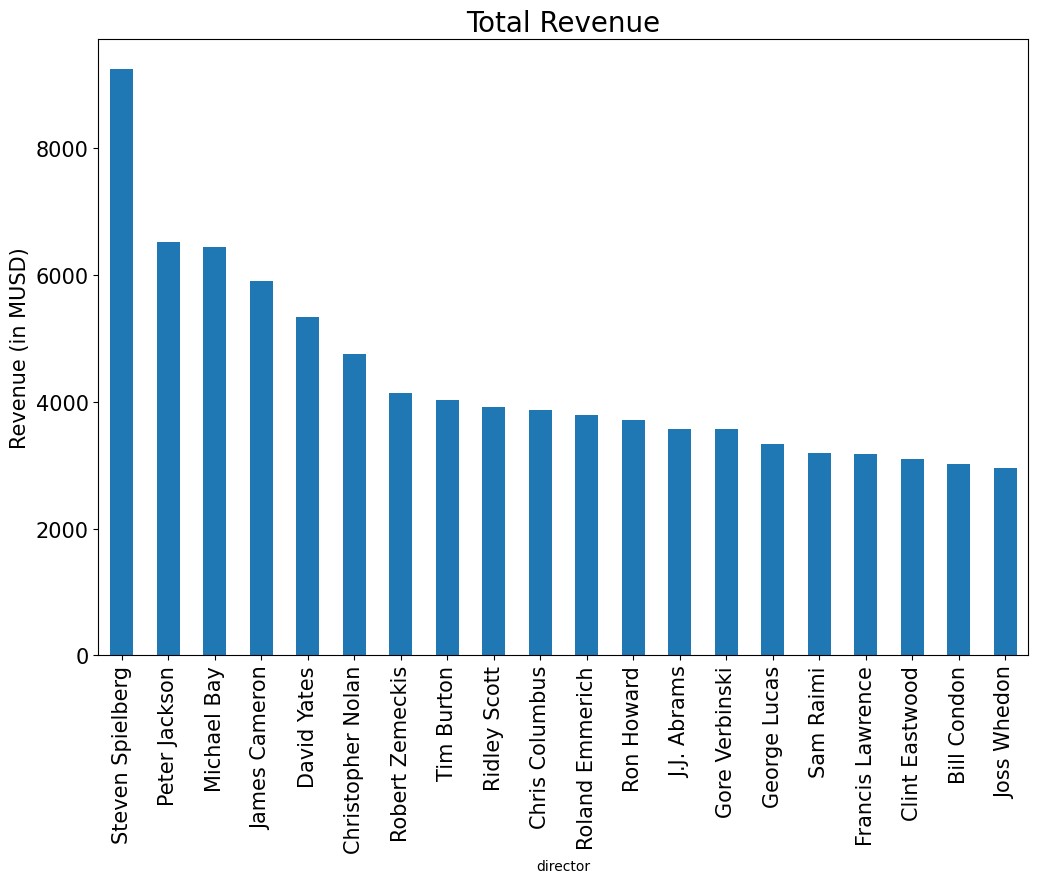

In [57]:
plt.figure(figsize=(12,8))
df.groupby('director').revenue_musd.sum().nlargest(20).plot(kind='bar', fontsize=15)
plt.title("Total Revenue", fontsize=20)
plt.ylabel("Revenue (in MUSD)", fontsize=15)
plt.show()

In [58]:
directors = df.groupby("director").agg({"title": "count", "vote_average": "mean", "vote_count": "sum"})
directors

title  vote_average  vote_count
director                                            
 Dale Trevillion\t       2           4.0         4.0
 Davide Manuli           1           6.9        10.0
 E.W. Swackhamer         1           5.9         5.0
 Vitaliy Vorobyov        1           5.5         3.0
 Yeon Sang-Ho            4           6.6      1039.0
...                    ...           ...         ...
Ярополк Лапшин           1          10.0         1.0
پیمان معادی              1           6.0         2.0
塩谷 直義                    1           7.2        40.0
杰森·莫玛                    1           5.8        28.0
진모영                      1           6.0         6.0

[17349 rows x 3 columns]

In [59]:
directors[(directors.vote_count >= 10000) & (directors.title >= 10)].nlargest(20, "vote_average")

title  vote_average  vote_count
director                                          
Hayao Miyazaki        14      7.700000     14700.0
Christopher Nolan     11      7.618182     67344.0
Quentin Tarantino     10      7.490000     45910.0
Wes Anderson          10      7.370000     11743.0
David Fincher         10      7.350000     37588.0
Martin Scorsese       39      7.218421     35541.0
Peter Jackson         13      7.138462     47571.0
Joel Coen             17      7.023529     18139.0
James Cameron         11      6.927273     33736.0
Stanley Kubrick       16      6.912500     18214.0
James Mangold         10      6.900000     16607.0
Steven Spielberg      33      6.893939     62266.0
Danny Boyle           14      6.871429     16504.0
Guy Ritchie           10      6.800000     19626.0
Robert Zemeckis       19      6.794737     37666.0
Terry Gilliam         14      6.764286     10049.0
Tim Burton            21      6.733333     36922.0
John Lasseter         10      6.720000     18337.0
Ang Lee               14      6.714286     11164.0
Antoine Fuqua         12      6.708333     15519.0

In [60]:
df.genres = df.genres.astype(str)

In [61]:
df.loc[df.genres.str.contains("Horror")].groupby("director").revenue_musd.sum().nlargest(20)

director
Paul W.S. Anderson     982.288069
James Wan              861.308375
Wes Craven             834.932742
Francis Lawrence       816.233738
Ridley Scott           689.004312
Marc Forster           531.865000
Steven Spielberg       500.104919
William Friedkin       466.403172
Darren Lynn Bousman    456.342667
M. Night Shyamalan     375.372060
Henry Joost            349.073570
David R. Ellis         348.742016
Adrian Lyne            346.110837
James DeMonaco         316.699354
Stephen Sommers        311.460501
Gore Verbinski         275.908490
Guillermo del Toro     261.629364
John R. Leonetti       255.273813
Fede Alvarez           254.643797
Jordan Peele           252.434250
Name: revenue_musd, dtype: float64

# Actor

In [62]:
df.cast

0        Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1        Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2        Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
3        Whitney Houston|Angela Bassett|Loretta Devine|...
4        Steve Martin|Diane Keaton|Martin Short|Kimberl...
                               ...                        
44686              Leila Hatami|Kourosh Tahami|Elham Korda
44687    Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...
44688    Erika Eleniak|Adam Baldwin|Julie du Page|James...
44689    Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...
44690                                                  NaN
Name: cast, Length: 44691, dtype: object

In [63]:
df.set_index("id", inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, 862 to 461257
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  44691 non-null  object        
 1   tagline                20284 non-null  object        
 2   release_date           44657 non-null  datetime64[ns]
 3   genres                 44691 non-null  object        
 4   belongs_to_collection  4463 non-null   object        
 5   original_language      44681 non-null  object        
 6   budget_musd            8854 non-null   float64       
 7   revenue_musd           7385 non-null   float64       
 8   production_companies   33356 non-null  object        
 9   production_countries   38835 non-null  object        
 10  vote_count             44691 non-null  float64       
 11  vote_average           42077 non-null  float64       
 12  popularity             44691 non-null  float64       
 13  run

In [65]:
df.cast.str.split("|")

id
862       [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
8844      [Robin Williams, Jonathan Hyde, Kirsten Dunst,...
15602     [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...
31357     [Whitney Houston, Angela Bassett, Loretta Devi...
11862     [Steve Martin, Diane Keaton, Martin Short, Kim...
                                ...                        
439050          [Leila Hatami, Kourosh Tahami, Elham Korda]
111109    [Angel Aquino, Perry Dizon, Hazel Orencio, Joe...
67758     [Erika Eleniak, Adam Baldwin, Julie du Page, J...
227506    [Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...
461257                                                  NaN
Name: cast, Length: 44691, dtype: object

In [66]:
act = df.cast.str.split("|", expand=True)
act

0                  1               2    \
id                                                            
862            Tom Hanks          Tim Allen     Don Rickles   
8844      Robin Williams      Jonathan Hyde   Kirsten Dunst   
15602     Walter Matthau        Jack Lemmon     Ann-Margret   
31357    Whitney Houston     Angela Bassett  Loretta Devine   
11862       Steve Martin       Diane Keaton    Martin Short   
...                  ...                ...             ...   
439050      Leila Hatami     Kourosh Tahami     Elham Korda   
111109      Angel Aquino        Perry Dizon   Hazel Orencio   
67758      Erika Eleniak       Adam Baldwin   Julie du Page   
227506  Iwan Mosschuchin  Nathalie Lissenko    Pavel Pavlov   
461257               NaN                NaN             NaN   

                              3               4                  5    \
id                                                                     
862                    Jim Varney   Wallace Shawn  John Ratzenberger   
8844               Bradley Pierce     Bonnie Hunt      Bebe Neuwirth   
15602                Sophia Loren    Daryl Hannah   Burgess Meredith   
31357                 Lela Rochon   Gregory Hines    Dennis Haysbert   
11862   Kimberly Williams-Paisley  George Newbern      Kieran Culkin   
...                           ...             ...                ...   
439050                       None            None               None   
111109                 Joel Torre   Bart Guingona      Soliman Cruz    
67758                 James Remar    Damian Chapa     Louis Mandylor   
227506          Aleksandr Chabrov     Vera Orlova               None   
461257                        NaN             NaN                NaN   

                     6                    7                      8    \
id                                                                     
862          Annie Potts          John Morris        Erik von Detten   
8844    David Alan Grier    Patricia Clarkson         Adam Hann-Byrd   
15602       Kevin Pollak                 None                   None   
31357      Michael Beach   Mykelti Williamson         Lamont Johnson   
11862            BD Wong  Peter Michael Goetz  Kate McGregor-Stewart   
...                  ...                  ...                    ...   
439050              None                 None                   None   
111109            Roeder        Angeli Bayani            Dante Perez   
67758         Tom Wright      Jeremy Lelliott       James Quattrochi   
227506              None                 None                   None   
461257               NaN                  NaN                    NaN   

                     9    ...   303   304   305   306   307   308   309   310  \
id                        ...                                                   
862       Laurie Metcalf  ...  None  None  None  None  None  None  None  None   
8844    Laura Bell Bundy  ...  None  None  None  None  None  None  None  None   
15602               None  ...  None  None  None  None  None  None  None  None   
31357      Wesley Snipes  ...  None  None  None  None  None  None  None  None   
11862         Jane Adams  ...  None  None  None  None  None  None  None  None   
...                  ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   
439050              None  ...  None  None  None  None  None  None  None  None   
111109   Betty Uy-Regala  ...  None  None  None  None  None  None  None  None   
67758      Jason Widener  ...  None  None  None  None  None  None  None  None   
227506              None  ...  None  None  None  None  None  None  None  None   
461257               NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

         311   312  
id                  
862     None  None  
8844    None  None  
15602   None  None  
31357   None  None  
11862   None  None  
...      ...   ...  
439050  None  None  
111109  None  None  
67758   None  None  
227506  None  None  
461257   NaN   NaN  


In [67]:
act = act.stack().reset_index(level=1, drop=True).to_frame()

In [68]:
act

0
id                       
862             Tom Hanks
862             Tim Allen
862           Don Rickles
862            Jim Varney
862         Wallace Shawn
...                   ...
227506   Iwan Mosschuchin
227506  Nathalie Lissenko
227506       Pavel Pavlov
227506  Aleksandr Chabrov
227506        Vera Orlova

[557703 rows x 1 columns]

In [69]:
act.columns = ["Actor"]

In [70]:
act = act.merge(df[["title", "revenue_musd", "vote_average", "popularity"]],
                how="left", left_index = True, right_index= True)

In [71]:
act

Actor             title  revenue_musd  vote_average  \
id                                                                        
862             Tom Hanks         Toy Story    373.554033           7.7   
862             Tim Allen         Toy Story    373.554033           7.7   
862           Don Rickles         Toy Story    373.554033           7.7   
862            Jim Varney         Toy Story    373.554033           7.7   
862         Wallace Shawn         Toy Story    373.554033           7.7   
...                   ...               ...           ...           ...   
227506   Iwan Mosschuchin  Satan Triumphant           NaN           NaN   
227506  Nathalie Lissenko  Satan Triumphant           NaN           NaN   
227506       Pavel Pavlov  Satan Triumphant           NaN           NaN   
227506  Aleksandr Chabrov  Satan Triumphant           NaN           NaN   
227506        Vera Orlova  Satan Triumphant           NaN           NaN   

        popularity  
id                  
862      21.946943  
862      21.946943  
862      21.946943  
862      21.946943  
862      21.946943  
...            ...  
227506    0.003503  
227506    0.003503  
227506    0.003503  
227506    0.003503  
227506    0.003503  

[557703 rows x 5 columns]

# 80s & 90s